# 2. Wrangle the Raster Data (3 layers)
# Part 2:  Elevation Data using SRTM

In [1]:
# Download stored variables from previous notebook

%store -r habitat_suitability_data_dir usfs_grasslands_path 
%store -r comanche_grassland_gdf pawnee_grassland_gdf usfs_grasslands_gdf

In [2]:
# Prepare for download Part 1 of 1
## Import packages that will help with...

# Reproducible file paths
import os # Reproducible file paths
import pathlib # Find the home folder
from glob import glob  # returns list of paths
import zipfile # Work with zip files

# Find files by pattern
import matplotlib.pyplot as plt # Overlay pandas and xarry plots,Overlay raster and vector data
import rioxarray as rxr # Work with geospatial raster data


# Work with tabular, vector, and raster data
import cartopy.crs as ccrs # CRSs (Coordinate Reference Systems)
import geopandas as gpd # work with vector data
import hvplot.pandas # Interactive tabular and vector data
import hvplot.xarray # Interactive raster
from math import floor, ceil # working with bounds, floor rounds down ciel rounds up
import pandas as pd # Group and aggregate
from rioxarray.merge import merge_arrays # Merge rasters
import xarray as xr # Adjust images
import xrspatial # calculate slope

# Access NASA data
import earthaccess # Access NASA data from the cloud

In [3]:
# Prep for downloading SRTM 

# Create data dir 
elevation_dir= os.path.join(habitat_suitability_data_dir, 'srtm')
os.makedirs(elevation_dir, exist_ok=True)

# call the variable to check location
elevation_dir

'/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm'

In [4]:
# bounds_gdfs
#comanche_grassland_gdf = gpd.read_file('path_to_shapefile_area1.shp'),
#pawnee_grassland_gdf = gpd.read_file('path_to_shapefile_area2.shp')
chosen_grasslands_bounds_gdfs = [comanche_grassland_gdf, pawnee_grassland_gdf]

In [5]:
# Download Raster data through earthaccess Part 1 of 1
# Login and search earthaccess, download results

# login to earthaccess
earthaccess.login(strategy="interactive", persist=True)

# bounds_gdfs
chosen_grasslands_bounds_gdfs = [comanche_grassland_gdf, pawnee_grassland_gdf]

# Iterate through the list of bounding GeoDataFrames (areas of interest)
for bounds_gdf in chosen_grasslands_bounds_gdfs:

    # Only download once - conditional
    #if not glob (os.path.join(elevation_dir, '*hgt.zip')):
    # *when I used this my code wouldn't work*
   
    bounds = tuple(bounds_gdf.total_bounds)

    # Search earthaccess
    elevation_results = earthaccess.search_data(
        short_name = "SRTMGL1",
        bounding_box = bounds
    )
    elevation_results

    # Download earthaccess results
    srtm_files = earthaccess.download(elevation_results, elevation_dir)

    # Return a list of file paths that match the pattern
    srtm_files = glob (os.path.join(
    elevation_dir, 
    '*hgt.zip')
    )

# Call srtm_file to see it 
srtm_files

QUEUEING TASKS | :   0%|          | 0/6 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/6 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/6 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

['/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W105.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W105.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W104.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W104.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W103.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W103.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N41W105.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N40W105.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N41W104.SRTMGL1.hgt.zip',
 '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N40W104.SRTMGL1.hgt.zip']

In [18]:
# Create list of files for each study area
comanche_srtm_files = [
    srtm_files[0], 
    srtm_files[1], 
    srtm_files[2], 
    srtm_files[3], 
    srtm_files[4], 
    srtm_files[5]
    ]
pawnee_srtm_files = [
    srtm_files[6], 
    srtm_files[7], 
    srtm_files[8], 
    srtm_files[9]
    ]

# Call each list to make sure it's right
srtm_files_list = [comanche_srtm_files , pawnee_srtm_files]
srtm_files_list

[['/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W105.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W105.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W104.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W104.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N37W103.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N36W103.SRTMGL1.hgt.zip'],
 ['/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N41W105.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N40W105.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N41W104.SRTMGL1.hgt.zip',
  '/Users/briannagleason/earth-analytics/data/habitat_suitability/srtm/N40W104.SRTMGL1.hgt.zip']]

In [7]:
# Create function with description to process srtm raster images
# Part 1 of 1
def process_image_list(url_list, chosen_buffer, bounds_gdfs):
    """
    Load, crop, and scale a raster image 

    Parameters
    ----------
    url: file-like or path-like
      File accessor downloaded or obtained 
    chosen_buffer: float number
      Amount of degrees to extend past the bounds of the bounds_gdf 
    bounds_gdf: gpd.GeoDataFrame
      Area of interest to crop to

    Returns
    -------
    merged_da: rxr.DataArray
      Processed raster
    """   
        
    # List to store cropped DataArrays for the current site 
    da_list= []
      
    buffer= chosen_buffer

    for url in url_list:

        # Connect to the raster image
        da = rxr.open_rasterio(
          url, 
          mask_and_scale=True
          ).squeeze()
        
          # Get the study bounds
        bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (
          bounds_gdf
          .to_crs(da.rio.crs)
          .total_bounds 
          )

        # Crop the raster image to the bounds of the study area
        cropped_da = (
          da.rio.clip_box(bounds_min_lon-buffer, bounds_min_lat-buffer, bounds_max_lon+buffer, bounds_max_lat+buffer)
          )
        
        # Append the cropped DataArray to the list
        da_list.append(cropped_da)

        # Merge the cropped DataArrays for this site
        merged_da = (
          merge_arrays(da_list)
          )
    
    
    return merged_da


In [8]:
# Use process_image_list function on each set of site files 
# save to new variable names to use later

# Use process_image_list function on comanche srtm files
srtm_comanche_result_da = process_image_list(comanche_srtm_files, .025, comanche_grassland_gdf)

# Use process_image_list function on comanche srtm files
srtm_pawnee_result_da = process_image_list(pawnee_srtm_files, .025, pawnee_grassland_gdf)

# Create a list to save the site srtm results to
# Call this list to make sure it worked
srtm_da_results = [
    srtm_comanche_result_da,
    srtm_pawnee_result_da
]
srtm_da_results

(<xarray.DataArray (y: 1594, x: 4566)> Size: 29MB
 array([[1899., 1899., 1899., ..., 1487., 1487., 1487.],
        [1899., 1900., 1901., ..., 1488., 1488., 1487.],
        [1901., 1901., 1902., ..., 1487., 1487., 1487.],
        ...,
        [1546., 1545., 1545., ..., 1368., 1369., 1368.],
        [1546., 1545., 1544., ..., 1368., 1367., 1366.],
        [1545., 1544., 1543., ..., 1368., 1366., 1366.]], dtype=float32)
 Coordinates:
   * x            (x) float64 37kB -104.8 -104.8 -104.8 ... -103.5 -103.5 -103.5
   * y            (y) float64 13kB 41.03 41.03 41.03 41.03 ... 40.58 40.58 40.58
     band         int64 8B 1
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Point
     units:          m
     _FillValue:     nan,
 <xarray.DataArray (y: 3491, x: 6467)> Size: 90MB
 array([[1400., 1400., 1399., ..., 1146., 1146.,   nan],
        [1401., 1401., 1400., ..., 1147., 1146.,   nan],
        [1402., 1402., 1400., ..., 1148., 1148.,   nan],
        ...,
        [1893., 1894.,

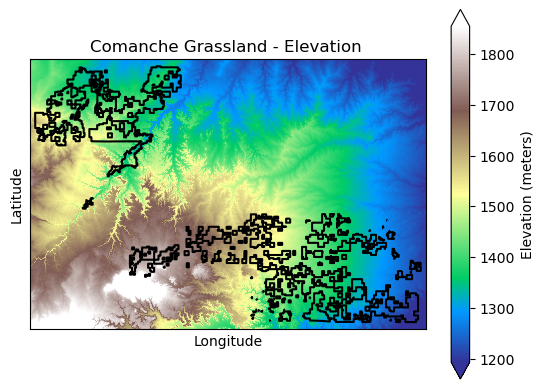

In [9]:
# Process data using the process_image_list function

# Test the function on 1 study area
srtm_comanche_result_da.plot(
    cbar_kwargs={"label": "Elevation (meters)"},
    robust=True,
    cmap='terrain',
)
# Overlay the boundary of the same study area
comanche_grassland_gdf.boundary.plot(ax=plt.gca(),
    color='black').set(
        title='Comanche Grassland - Elevation ',
        xlabel='Longitude', 
        ylabel='Latitude',
        xticks=[],
        yticks=[] 
    )
plt.show()


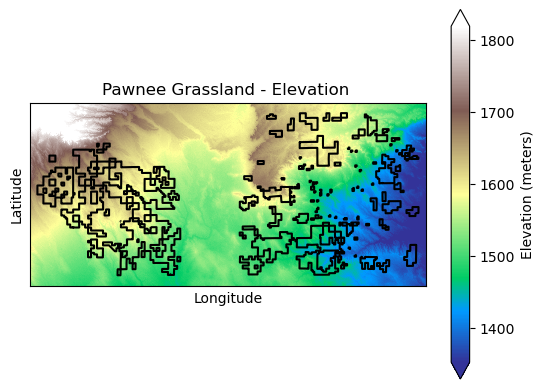

In [10]:
# Process data using the process_image_list function

# Test the function on 1 study area
srtm_pawnee_result_da.plot(
    cbar_kwargs={"label": "Elevation (meters)"},
    robust=True,
    cmap='terrain',
)
# Overlay the boundary of the same study area
pawnee_grassland_gdf.boundary.plot(ax=plt.gca(),
    color='black').set(
        title='Pawnee Grassland - Elevation ',
        xlabel='Longitude', 
        ylabel='Latitude',
        xticks=[],
        yticks=[] 
    )
plt.show()

In [22]:
# Calculate Slope using for loop

#
slope_da_list = []

# Iterate through a list of sites 
for srtm_result in srtm_da_results:
    
    slope_da_list = [] 

    # Reproject into epsg utm zone
    utm13_epsg = 32613
    srtm_proj_da = srtm_result.rio.reproject(utm13_epsg)

    # Calculate slope
    slope_da = xrspatial.slope(srtm_proj_da)
    
    slope_da_list.append(dict(
                    utm13_epsg = utm13_epsg,
                    srtm_proj_da = srtm_proj_da ,
                    da = slope_da
                    ))  
    print(slope_da)

srtm_df = pd.DataFrame(slope_da_list)
srtm_df.da.values



<xarray.DataArray 'slope' (y: 4237, x: 6163)> Size: 104MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x            (x) float64 49kB 5.805e+05 5.805e+05 ... 7.414e+05 7.414e+05
  * y            (y) float64 34kB 4.203e+06 4.202e+06 ... 4.092e+06 4.092e+06
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    units:          m
    _FillValue:     nan
<xarray.DataArray 'slope' (y: 2060, x: 4413)> Size: 36MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=f

array([<xarray.DataArray 'slope' (y: 2060, x: 4413)> Size: 36MB
       array([[nan, nan, nan, ..., nan, nan, nan],
              [nan, nan, nan, ..., nan, nan, nan],
              [nan, nan, nan, ..., nan, nan, nan],
              ...,
              [nan, nan, nan, ..., nan, nan, nan],
              [nan, nan, nan, ..., nan, nan, nan],
              [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
       Coordinates:
         * x            (x) float64 35kB 5.154e+05 5.155e+05 ... 6.228e+05 6.228e+05
         * y            (y) float64 16kB 4.543e+06 4.543e+06 ... 4.493e+06 4.493e+06
           band         int64 8B 1
           spatial_ref  int64 8B 0
       Attributes:
           AREA_OR_POINT:  Point
           units:          m
           _FillValue:     nan                                                      ],
      dtype=object)

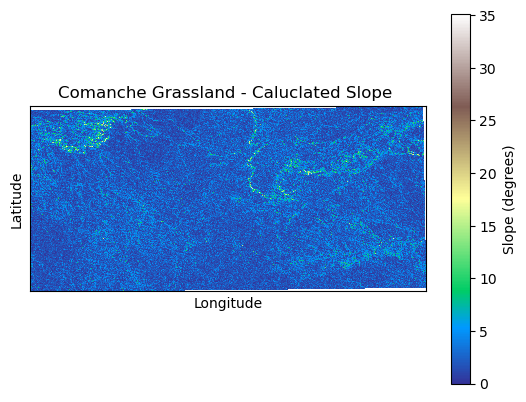

In [12]:
# Test to make sure the slope function worked by plotting
slope_da.plot(
    cbar_kwargs={"label": "Slope (degrees)"},
    cmap='terrain',
)
comanche_grassland_gdf.to_crs(utm13_epsg).boundary.plot(
    ax=plt.gca(),
    color='white').set(
        title='Comanche Grassland - Caluclated Slope ',
        xlabel='Longitude', 
        ylabel='Latitude',
        xticks=[],
        yticks=[] 
    )
plt.show()

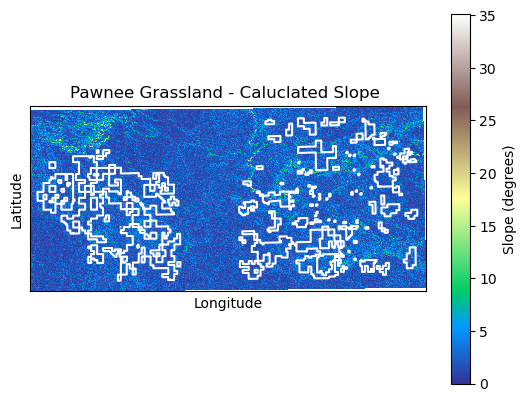

In [13]:
# Test to make sure the slope function worked by plotting
slope_da.plot(
    cbar_kwargs={"label": "Slope (degrees)"},
    cmap='terrain',
)
pawnee_grassland_gdf.to_crs(utm13_epsg).boundary.plot(
    ax=plt.gca(),
    color='white').set(
        title='Pawnee Grassland - Caluclated Slope ',
        xlabel='Longitude', 
        ylabel='Latitude',
        xticks=[],
        yticks=[] 
    )
plt.show()

In [19]:
# Store variables needed in future notebooks

%store srtm_comanche_result_da srtm_pawnee_result_da srtm_da_results srtm_files_list slope_da slope_da_list

Stored 'srtm_comanche_result_da' (DataArray)
Stored 'srtm_pawnee_result_da' (DataArray)
Stored 'srtm_da_results' (list)
Stored 'srtm_files_list' (list)
Stored 'slope_da' (DataArray)
Stored 'slope_da_list' (list)
